In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Rice_Citation_Request.txt
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (11154).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8058).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (5150).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8267).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (8747).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (2970).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (10959).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (4976).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (730).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (9279).jpg
/kaggle/input/rice-image-dataset/Rice_Image_Dataset/Karacadag/Karacadag (534).jpg
/kaggle/i

In [5]:
import matplotlib.pylab as plt

import glob as gb
import cv2

from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [6]:
dir_df = '../input/rice-image-dataset/Rice_Image_Dataset/'

for i in os.listdir(dir_df):
    files = gb.glob(pathname= str(dir_df + i + '/*.jpg'))
    print(f'There is {len(files)} file in folder {i}')

There is 15000 file in folder Karacadag
There is 15000 file in folder Basmati
There is 15000 file in folder Jasmine
There is 0 file in folder Rice_Citation_Request.txt
There is 15000 file in folder Arborio
There is 15000 file in folder Ipsala


In [7]:
# Create variable and function to make encoding and access key value

encode_rice = {'Karacadag':0,
       'Basmati':1,
       'Jasmine':2,
       'Arborio':3, 
       'Ipsala':4
      }

def get_code(n) : 
    for x, y in encode_rice.items() : 
        if n == y : 
            return x 

In [8]:
s = 100
X = []
y = []

for folder in os.listdir(dir_df) : 
    files = gb.glob(pathname= str(dir_df + folder + '/*.jpg'))
    
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X.append(list(image_array))
        y.append(encode_rice[folder])

In [9]:
print(f'we have {len(X)} items in X data')
print(f'we have {len(y)} items in y data')

we have 75000 items in X data
we have 75000 items in y data


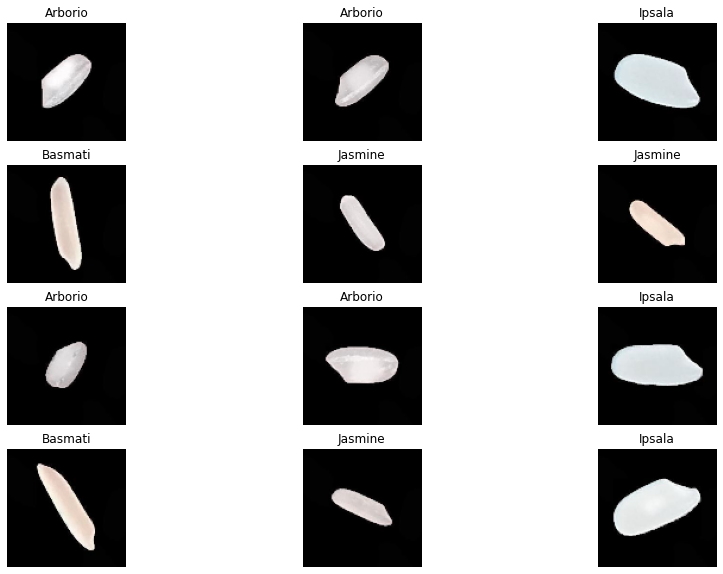

In [10]:
plt.figure(figsize=(15,10))

for n, i in enumerate(list(np.random.randint(0,len(X),12))) : 
    plt.subplot(4,3,n+1)
    plt.imshow(X[i])   
    plt.axis('off')
    plt.title(get_code(y[i]))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Convert to numpy array 
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
model = keras.models.Sequential([
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(256,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(128,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten(),    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(5,activation='softmax') ,    
        ])

2022-10-28 14:13:26.124519: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 14:13:26.254043: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 14:13:26.254877: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-28 14:13:26.256980: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [13]:
model.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 256)       7168      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 256)       590080    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 128)       295040    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 64)        73792     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

In [15]:
epoch = 10
history = model.fit(X_train, y_train, epochs=epoch, batch_size=64, verbose=1)

2022-10-28 14:13:29.240191: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1800000000 exceeds 10% of free system memory.
2022-10-28 14:13:31.282244: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 1800000000 exceeds 10% of free system memory.
2022-10-28 14:13:33.016410: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-10-28 14:13:34.484086: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


938/938 [==============================] - 133s 132ms/step - loss: 0.3855 - accuracy: 0.9320
Epoch 2/10
938/938 [==============================] - 122s 130ms/step - loss: 0.0979 - accuracy: 0.9673
Epoch 3/10
938/938 [==============================] - 122s 130ms/step - loss: 0.0697 - accuracy: 0.9772
Epoch 4/10
938/938 [==============================] - 121s 130ms/step - loss: 0.0381 - accuracy: 0.9879
Epoch 5/10
938/938 [==============================] - 122s 130ms/step - loss: 0.0305 - accuracy: 0.9900
Epoch 6/10
938/938 [==============================] - 122s 130ms/step - loss: 0.0278 - accuracy: 0.9908
Epoch 7/10
938/938 [==============================] - 122s 130ms/step - loss: 0.0289 - accuracy: 0.9909
Epoch 8/10
938/938 [==============================] - 122s 130ms/step - loss: 0.0137 - accuracy: 0.9956
Epoch 9/10
938/938 [==============================] - 122s 130ms/step - loss: 0.0176 - accuracy: 0.9943
Epoch 10/10
938/938 [==============================] - 122s 130ms/step - lo

In [16]:
ModelLoss, ModelAccuracy = model.evaluate(X_test, y_test,batch_size=64)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

2022-10-28 14:34:55.470828: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 450000000 exceeds 10% of free system memory.
2022-10-28 14:34:56.048873: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 450000000 exceeds 10% of free system memory.


235/235 [==============================] - 11s 45ms/step - loss: 0.0239 - accuracy: 0.9939
Test Loss is 0.023911738768219948
Test Accuracy is 0.9938666820526123
